# Overcoming Gibb's: Filters

/home/xerox/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


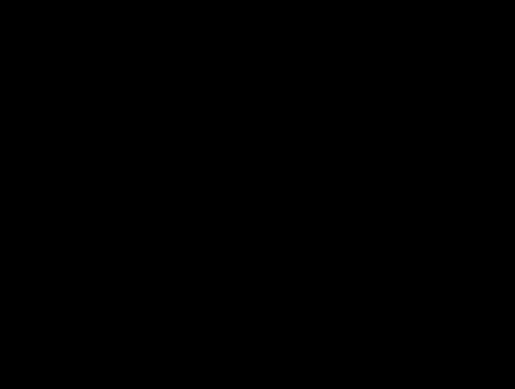

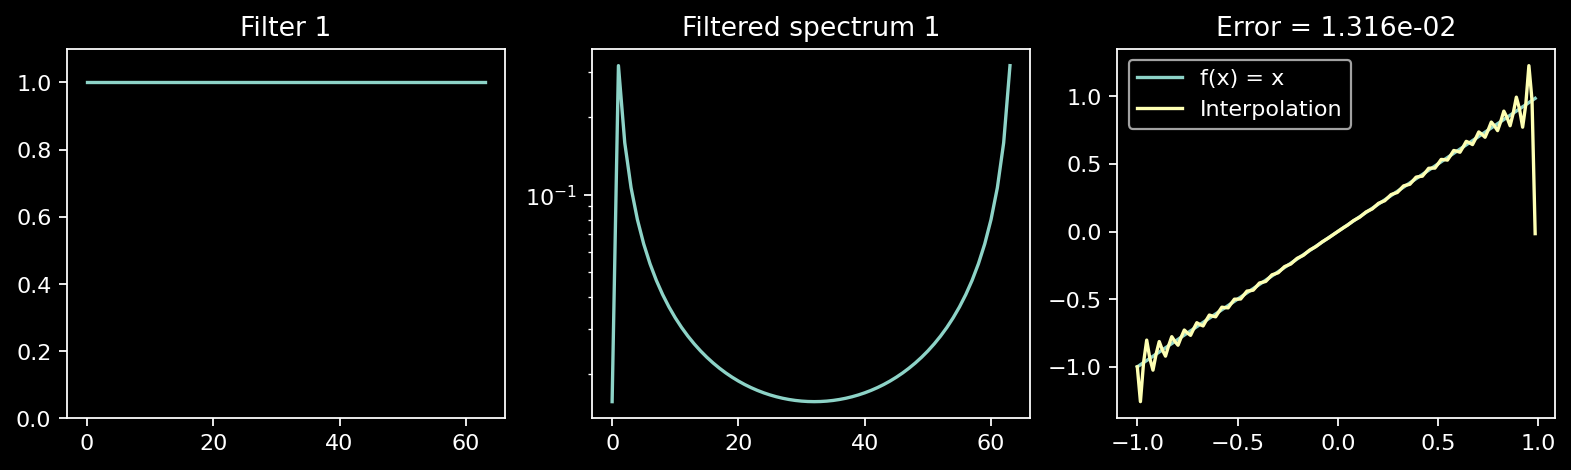

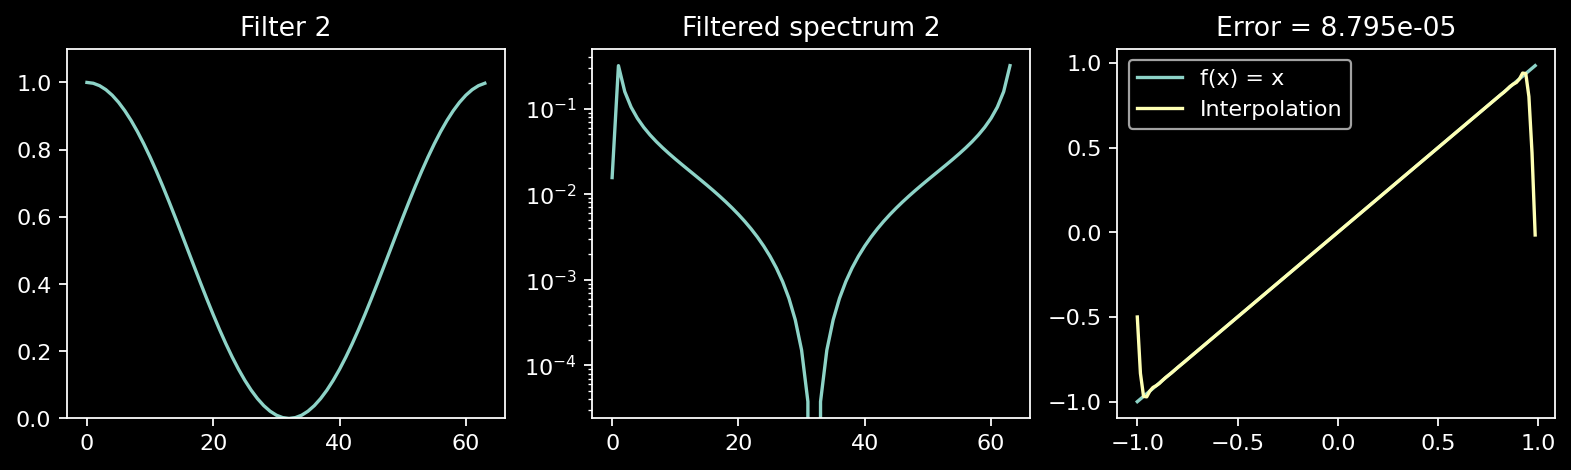

In [22]:
# import libraries
import numpy as np
import scipy
import scipy.integrate
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
plt.axis("off") 
plt.style.use('dark_background')

def sigma0(eta):
    return np.ones(eta.shape)

def sigma1(eta):
    return 0.5 * ( 1 + np.cos ( np.pi * eta ) ) 

filters = [sigma0, sigma1]

# Number of sample points
N  = 64
Ni = 128 
x  = np.linspace(-1, 1, N,  endpoint=False)
xi = np.linspace(-1, 1, Ni, endpoint=False)

# Sampled function values
def func(x):
    return x
f = func(x)

def interpolate(y, Ni, s):
    N             = len(y) 
    yhat          = fft(y, norm="forward")
    yhat_filtered = yhat * s 
    Npad          = int(Ni/2 - N/2)
    yt            = np.fft.fftshift(yhat_filtered)
    ypad          = np.concatenate([np.zeros(Npad), yt, np.zeros(Npad)])
    ypad          = np.fft.fftshift(ypad)
    yi            = ifft(ypad, norm="forward")
    return yhat, yi

# Plot the results
for i, filter in enumerate(filters):
    # Create sigma function for the current filter
    def sigma(x):
        k = np.fft.fftfreq(len(x))
        k /= np.max(np.abs(k))
        return filter(np.abs(k))

    fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=160)

    s          = sigma(x)
    fhat, fint = interpolate(f, Ni, s) 
    

    k = np.fft.fftfreq(len(x))
    ax[0].set_title(f"Filter {i + 1}")
    ax[0].plot(s)  # Plot the filter
    ax[0].set_ylim(0, 1.1)

    ax[1].set_title(f"Filtered spectrum {i + 1}")    
    ax[1].set_yscale("log")
    ax[1].plot(np.abs(fhat) * s)  # Plot the magnitude of the Fourier coefficients
    
    ax[2].set_title(f"Error = {np.mean(np.abs(fint[8:-8] - func(xi)[8:-8])):3.3e}")
    ax[2].plot(xi, func(xi), label="f(x) = x")  # Plot the error
    ax[2].plot(xi, fint, label="Interpolation")  # Plot the error
    ax[2].legend()

    plt.savefig(f"figures/filter_{i+1}.png")
    
    plt.show()